# Cowface Localiser (YOLO)

## Preliminaries

In [21]:
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
%matplotlib inline

## Training

In [22]:
!git clone https://github.com/ultralytics/yolov5  # clone
os.chdir('yolov5/')
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 12219, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 12219 (delta 6), reused 10 (delta 4), pack-reused 12197bjects:  24% (2933/12219), 1.71 MiB | 1.70 MiB/sReceiving objects:  26% (3177/12219), 2.30 MiB | 1.51 MiB/sReceiving objects:  29% (3544/12219), 2.30 MiB | 1.51 MiB/sReceiving objects:  34% (4155/12219), 2.30 MiB | 1.51 MiB/sReceiving objects:  35% (4277/12219), 3.42 MiB | 1.69 MiB/sReceiving objects:  39% (4766/12219), 3.42 MiB | 1.69 MiB/sReceiving objects:  41% (5010/12219), 3.42 MiB | 1.69 MiB/sReceiving objects:  43% (5255/12219), 3.42 MiB | 1.69 MiB/sReceiving objects:  45% (5499/12219), 4.36 MiB | 1.72 MiB/sReceiving objects:  47% (5743/12219), 4.36 MiB | 1.72 MiB/sReceiving objects:  50% (6110/12219), 4.36 MiB | 1.72 MiB/sReceiving objects:  52% (6354/12219), 4.36 MiB | 1.72 MiB/sReceiving objects:  54% (6599/12219), 4.36 MiB | 1.72 MiB/sReceiving obj

In [23]:
# Train a new model on the dataset
!python train.py --project cowface --img 224 --batch 128 --epochs 300 --data 'data/datasets/yolo/dataset/data.yaml' --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=data/datasets/yolo/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=128, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=cowface, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
Traceback (most recent call last):
  File "/Users/adam/git/agricam/yolov5/yolov5/train.py", line 630, in <module>
    main(opt)
  File "/Users/adam/git/agricam/yolov5/yolov5/train.py", line 501, in main
    check_file(opt.data), check_yaml(opt.cfg), check_yaml(opt.hyp), str(opt.weights), str(opt.project)  # checks
  File "/U

## Detection & Localisation

In [25]:
os.chdir('..')
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt')

Using cache found in /Users/adam/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-4 Python-3.9.13 torch-1.12.1 CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [26]:
'''
Run inference on, and return a cell count for, the given image
'''
def detect(img: str) -> tuple[pd.DataFrame, np.ndarray]:
  # Run inference on the images
  results: yolov5.models.common.Detections = model(f'data/datasets/yolo/dataset/images/{img}.jpg')

  df = results.pandas().xyxy


  results.render()
  img = results.ims[0]

  return df, img

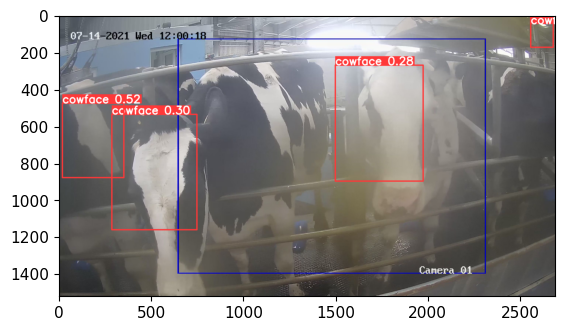

In [27]:
df, img = detect('test_2')
plt.imshow(img)
plt.show()

In [28]:
df2 = detect('test_2')

In [29]:
df3 = detect('test_3')